Imports

In [506]:
import numpy as np
import copy
import math
import random
import matplotlib.pyplot as plt
from scipy.special import betaincinv
import time

Classes

In [507]:
class node:
    #nodes constructor
    def __init__(self, id, x, y):
        self.Id = id
        self.x = x
        self.y = y
#End class nodes

class individual:
    def __init__(self, path, path_distance, fitness):
        self.path = path
        self.path_distance = path_distance
        self.fitness = fitness #fitness compared to other individuals in population
#End class individual

class chromosome:
    def __init__(self, chromosome, index):
        self.selected_chromosome = chromosome
        self.index = index #used for sorting, index of parents chromosome that got selected
#End class chromosome

Functions

In [527]:
#distance between two points
def distance(x1, y1, x2, y2):
    d = math.sqrt(((x2 - x1)**2) + ((y2 - y1)**2))
    return d
#End distance

#Path Distance (total distance of a path)
def calcPathDistance(path, node_arr):
    path_distance = 0
    closed_path = copy.deepcopy(path)
    closed_path.append(path[0])
    for f in range(len(path) - 1):
        path_distance += distance(node_arr[closed_path[f]].x, node_arr[closed_path[f]].y, node_arr[closed_path[f+1]].x, node_arr[closed_path[f+1]].y)
    return path_distance
#End path distance

#initialize individual (initial random path)
def initializeIndividual(node_id):
    new_path = copy.deepcopy(node_id)
    np.random.shuffle(new_path)
    return individual(new_path, 0, 0)
#End initialize individual

#Path fitness (fitness compared to other individuals in population)
def pathFitness(path_distance, sum_fitness):
    fitness = path_distance / sum_fitness
    return fitness
#End path fitness

#Tournament selection
def tournamentSelection(individuals, tournament_size):
    selected = []
    while len(selected) < 2:
        best_individual = []
        tournament = random.sample(individuals, tournament_size)
        best_individual.append(min(tournament, key=lambda r: r.fitness))
        selected.append(best_individual[0].path)
    return selected
#End Tournament Selection

#cyclic crossover
def cycleCrossover(parent1, parent2):
    length = len(parent1)
    child = [-1] * length
    cycle = []

    while -1 in child:
        index = child.index(-1)
        current_parent = parent1 if index % 2 == 0 else parent2

        while index not in cycle:
            cycle.append(index)
            index = parent1.index(parent2[index])

        for i in cycle:
            child[i] = current_parent[i]

        cycle = []

    return child
#End cycle crossover

#Mutation Swap two random cities
def mutation(path):
    index1, index2 = random.sample(range(len(path)), 2)
    path[index1], path[index2] = path[index2], path[index1]
#End mutation

Main function

In [544]:
#open file
try:
    file = open('Random11.tsp', 'r')
except FileNotFoundError:
    print('The file was not found!')

read_line = np.array(file.readlines())[7:]
node_arr = []
node_id = []
for line in range(len(read_line)):
    x = read_line[line].split()
    #node starts from 0 instead of 1
    node_arr.append(node(int(x[0]) - 1, float(x[1]), float(x[2])))
    node_id.append(line)

#Constant mutation, crossover, tournament size
CROSSOVER_PERCENTAGE = 50
MUTATION_PERCENTAGE = 100 - CROSSOVER_PERCENTAGE
TOURNAMENT_SIZE = 5
populationSize = 100 # fixed population size for the program
iter_generation = 1000 # number of generation to produce
individuals = [] # individuals of the population
sum_fitness = 0 # Total fitness of all individuals combined
generation = 0 #current generation
children = [] #current generation
best_distance_per_gen = [] #best path distance for every generation
best_path_per_gen = [] #best path for every generation
    
#Initializing all features of each path/individual
#Random Paths (Starting point/Initialize individuals)
for i in range(len(node_id)):
    individuals.append(initializeIndividual(node_id))
#Path distance
for i in range(len(individuals)):
    individuals[i].path_distance = calcPathDistance(individuals[i].path, node_arr)
    sum_fitness += individuals[i].path_distance
#Path fitness
for i in range(len(individuals)):
    individuals[i].fitness = pathFitness(individuals[i].path_distance, sum_fitness)
best_distance_per_gen.append(min(individuals, key=lambda r: r.path_distance).path_distance) #min path distance from instances of class individuals for 0th generation
#End Initializing all features of each path/individual

while generation < iter_generation: #number of generation to produce
    sum_fitness = 0
    children = []
    best_path = []
    best_distance = None
    while len(children) < populationSize: #number of children to produce for every generation
        #tournament selection
        parents = tournamentSelection(individuals, TOURNAMENT_SIZE)
        parent1 = parents[0]
        parent2 = parents[1]
        
        #cyclic crossover
        child = cycleCrossover(parent1, parent2)
        
        #mutation
        if random.uniform(0, len(child)) < MUTATION_PERCENTAGE:
                mutation(child)
        
        #childs path distance
        path_distance = calcPathDistance(child, node_arr)
        
        #find shortest path
        if best_distance == None:
            best_distance = path_distance
            best_path = child
        elif path_distance < best_distance:
            best_distance = path_distance
            best_path = child
        sum_fitness += path_distance 
        children.append(individual(child, calcPathDistance(child, node_arr), 0))
    generation += 1
        
    for i in range(len(children)): #calculate childrens fitness
        children[i].fitness = pathFitness(children[i].path_distance, sum_fitness)
    
    individuals = copy.deepcopy(children) #copy new childrens and let go of previous generation
    best_distance_per_gen.append(min(individuals, key=lambda r: r.path_distance).path_distance) #min path distance from instances of class individuals for 0th generation 
    best_path_per_gen.append(best_path)
print("complete")

complete


perform wisdom of crowd, go from current city to another city that most experts picked

In [529]:
#Number of cities
frequency_matrix = [[0 for j in range(len(node_arr))] for i in range(len(node_arr))] #[row][column] from city/row to city/column
for row in range(len(best_path_per_gen)):
    for column in range(len(best_path_per_gen[0]) - 1):
        x = best_path_per_gen[row][column]
        y = best_path_per_gen[row][column + 1]
        frequency_matrix[x][y] = frequency_matrix[x][y] + 1
print("complete")

complete


In [530]:
frequency_matrix

[[0, 0, 204, 1, 0, 164, 471, 13, 0, 135, 12],
 [0, 0, 0, 55, 692, 1, 0, 2, 231, 1, 3],
 [120, 1, 0, 3, 0, 15, 498, 26, 0, 214, 123],
 [0, 754, 0, 0, 69, 35, 0, 22, 7, 6, 102],
 [0, 9, 0, 4, 0, 0, 0, 0, 758, 0, 0],
 [50, 5, 1, 473, 2, 0, 0, 283, 0, 94, 90],
 [308, 1, 396, 1, 0, 16, 0, 17, 0, 205, 56],
 [9, 9, 4, 124, 0, 400, 6, 0, 0, 192, 255],
 [0, 13, 0, 1, 236, 0, 0, 0, 0, 0, 2],
 [11, 11, 9, 37, 0, 184, 12, 385, 1, 0, 350],
 [0, 196, 6, 296, 1, 92, 5, 251, 1, 152, 0]]

Find wisdom of crowd path (connect cities based on sequence of highest values until all nodes are connected)

In [542]:
#class with frequecy count, row(city), column{city)
class frequencyCount:
    def __init__(self, count, from_city, to_city):
        self.count = count
        self.from_city = from_city
        self.to_city = to_city
        
#flatten frequency_matrix to node array of class frequencyCount
frequency_count_arr = []
for i in range(len(frequency_matrix)):
    for j in range(len(frequency_matrix)):
        count = frequency_matrix[i][j]
        frequency_count_arr.append(frequencyCount(count, i, j))
        
#sort frequency_count_arr in decending order based on count
frequency_count_arr = sorted(frequency_count_arr, key=lambda x: x.count, reverse=True)
wisdom_path = []
current_city = -1
while len(wisdom_path) < len(node_arr):
    for i in frequency_count_arr:
        if len(wisdom_path) == 0:
            wisdom_path.append(i.from_city)
            wisdom_path.append(i.to_city)
            current_city = i.to_city
            break
        elif i.from_city == current_city and i.to_city not in wisdom_path:
            wisdom_path.append(i.to_city)
            current_city = i.to_city
            break

calcPathDistance(wisdom_path, node_arr), wisdom_path

(298.72482749890384, [4, 8, 1, 3, 10, 7, 5, 9, 6, 2, 0])

In [543]:
min(best_distance_per_gen), best_distance_per_gen[-1]

(282.0823533159497, 300.3419594711467)

On Average how well did the Wisdom of Crowds approach perform compared to the standard  GA?

In [603]:
import numpy as np
import copy
import math
import random
import matplotlib.pyplot as plt

class node:
    #nodes constructor
    def __init__(self, id, x, y):
        self.Id = id
        self.x = x
        self.y = y
#End class nodes

class comparison:
    def __init__(self, best_of_all_gen, best_of_final_gen, woc):
        self.woc = woc
        self.best_of_all_gen = best_of_all_gen
        self.best_of_final_gen = best_of_final_gen

class individual:
    def __init__(self, path, path_distance, fitness):
        self.path = path
        self.path_distance = path_distance
        self.fitness = fitness #fitness compared to other individuals in population
#End class individual

class chromosome:
    def __init__(self, chromosome, index):
        self.selected_chromosome = chromosome
        self.index = index #used for sorting, index of parents chromosome that got selected
#End class chromosome

#distance between two points
def distance(x1, y1, x2, y2):
    d = math.sqrt(((x2 - x1)**2) + ((y2 - y1)**2))
    return d
#End distance

#Path Distance (total distance of a path)
def calcPathDistance(path, node_arr):
    path_distance = 0
    closed_path = copy.deepcopy(path)
    closed_path.append(path[0])
    for f in range(len(path) - 1):
        path_distance += distance(node_arr[closed_path[f]].x, node_arr[closed_path[f]].y, node_arr[closed_path[f+1]].x, node_arr[closed_path[f+1]].y)
    return path_distance
#End path distance

#initialize individual (initial random path)
def initializeIndividual(node_id):
    new_path = copy.deepcopy(node_id)
    np.random.shuffle(new_path)
    return individual(new_path, 0, 0)
#End initialize individual

#Path fitness (fitness compared to other individuals in population)
def pathFitness(path_distance, sum_fitness):
    fitness = path_distance / sum_fitness
    return fitness
#End path fitness

#Tournament selection
def tournamentSelection(individuals, tournament_size):
    selected = []
    while len(selected) < 2:
        best_individual = []
        tournament = random.sample(individuals, tournament_size)
        best_individual.append(min(tournament, key=lambda r: r.fitness))
        selected.append(best_individual[0].path)
    return selected
#End Tournament Selection

#cyclic crossover
def cycleCrossover(parent1, parent2):
    length = len(parent1)
    child = [-1] * length
    cycle = []

    while -1 in child:
        index = child.index(-1)
        current_parent = parent1 if index % 2 == 0 else parent2

        while index not in cycle:
            cycle.append(index)
            index = parent1.index(parent2[index])

        for i in cycle:
            child[i] = current_parent[i]

        cycle = []

    return child
#End cycle crossover

#Mutation Swap two random cities
def mutation(path):
    index1, index2 = random.sample(range(len(path)), 2)
    path[index1], path[index2] = path[index2], path[index1]
#End mutation

#open file
try:
    file = open('Random222.tsp', 'r')
except FileNotFoundError:
    print('The file was not found!')

read_line = np.array(file.readlines())[7:]
node_arr = []
node_id = []
for line in range(len(read_line)):
    x = read_line[line].split()
    #node starts from 0 instead of 1
    node_arr.append(node(int(x[0]) - 1, float(x[1]), float(x[2])))
    node_id.append(line)

apple = 0
finalDistance = []
while apple < 10:
    #Constant mutation, crossover, tournament size
    CROSSOVER_PERCENTAGE = 50
    MUTATION_PERCENTAGE = 100 - CROSSOVER_PERCENTAGE
    TOURNAMENT_SIZE = 5
    populationSize = 100 # fixed population size for the program
    iter_generation = 500 # number of generation to produce
    individuals = [] # individuals of the population
    sum_fitness = 0 # Total fitness of all individuals combined
    generation = 0 #current generation
    children = [] #current generation
    best_distance_per_gen = [] #best path distance for every generation
    best_path_per_gen = [] #best path for every generation

    #Initializing all features of each path/individual
    #Random Paths (Starting point/Initialize individuals)
    for i in range(len(node_id)):
        individuals.append(initializeIndividual(node_id))
    #Path distance
    for i in range(len(individuals)):
        individuals[i].path_distance = calcPathDistance(individuals[i].path, node_arr)
        sum_fitness += individuals[i].path_distance
    #Path fitness
    for i in range(len(individuals)):
        individuals[i].fitness = pathFitness(individuals[i].path_distance, sum_fitness)
    best_distance_per_gen.append(min(individuals, key=lambda r: r.path_distance).path_distance) #min path distance from instances of class individuals for 0th generation
    #End Initializing all features of each path/individual

    while generation < iter_generation: #number of generation to produce
        sum_fitness = 0
        children = []
        best_path = []
        best_distance = None
        while len(children) < populationSize: #number of children to produce for every generation
            #tournament selection
            parents = tournamentSelection(individuals, TOURNAMENT_SIZE)
            parent1 = parents[0]
            parent2 = parents[1]

            #cyclic crossover
            child = cycleCrossover(parent1, parent2)

            #mutation
            if random.uniform(0, len(child)) < MUTATION_PERCENTAGE:
                    mutation(child)

            #childs path distance
            path_distance = calcPathDistance(child, node_arr)

            #find shortest path
            if best_distance == None:
                best_distance = path_distance
                best_path = child
            elif path_distance < best_distance:
                best_distance = path_distance
                best_path = child
            sum_fitness += path_distance 
            children.append(individual(child, calcPathDistance(child, node_arr), 0))
        generation += 1

        for i in range(len(children)): #calculate childrens fitness
            children[i].fitness = pathFitness(children[i].path_distance, sum_fitness)

        individuals = copy.deepcopy(children) #copy new childrens and let go of previous generation
        best_distance_per_gen.append(min(individuals, key=lambda r: r.path_distance).path_distance) #min path distance from instances of class individuals for 0th generation 
        best_path_per_gen.append(best_path)

    #Number of cities
    frequency_matrix = [[0 for j in range(len(node_arr))] for i in range(len(node_arr))] #[row][column] from city/row to city/column
    for row in range(len(best_path_per_gen)):
        for column in range(len(best_path_per_gen[0]) - 1):
            x = best_path_per_gen[row][column]
            y = best_path_per_gen[row][column + 1]
            frequency_matrix[x][y] = frequency_matrix[x][y] + 1

    #class with frequecy count, row(city), column{city)
    class frequencyCount:
        def __init__(self, count, from_city, to_city):
            self.count = count
            self.from_city = from_city
            self.to_city = to_city

    #flatten frequency_matrix to node array of class frequencyCount
    frequency_count_arr = []
    for i in range(len(frequency_matrix)):
        for j in range(len(frequency_matrix)):
            count = frequency_matrix[i][j]
            frequency_count_arr.append(frequencyCount(count, i, j))

    #sort frequency_count_arr in decending order based on count
    frequency_count_arr = sorted(frequency_count_arr, key=lambda x: x.count, reverse=True)
    wisdom_path = []
    current_city = -1
    while len(wisdom_path) < len(node_arr):
        for i in frequency_count_arr:
            if len(wisdom_path) == 0:
                wisdom_path.append(i.from_city)
                wisdom_path.append(i.to_city)
                current_city = i.to_city
                break
            elif i.from_city == current_city and i.to_city not in wisdom_path:
                wisdom_path.append(i.to_city)
                current_city = i.to_city
                break
    finalDistance.append(comparison(min(best_distance_per_gen), best_distance_per_gen[-1], calcPathDistance(wisdom_path, node_arr)))    
    apple += 1
print('complete')

complete


In [583]:
avg_percent = [] #do not run this (clears average percent values)

In [604]:
print('GA_all gen', '    GA & WOC', '    GA_Final')
count = 0
count1 = 0
for i in finalDistance:
    if i.best_of_final_gen > i.woc:
        count += 1
    if i.best_of_all_gen > i.woc:
        count1 += 1
percent_difference = []
for i in finalDistance:
    print('%.2f'% i.best_of_all_gen, ' \t%.2f'%i.woc, '\t     %.2f'%i.best_of_final_gen)
    percent_difference.append(i.woc/i.best_of_all_gen)
avg_percent.append(sum(percent_difference)/len(percent_difference))
percent_difference = []
print('count WOC was better than GA_Final:', count)
print('count WOC was better than best_GA_all_gen:', count1)

GA_all gen     GA & WOC     GA_Final
4313.99  	5483.13 	     4313.99
4261.44  	5439.19 	     4261.44
4242.27  	5640.80 	     4242.27
4091.81  	5690.95 	     4091.81
4288.03  	5638.85 	     4288.03
4144.46  	5790.63 	     4144.46
3967.25  	5583.34 	     3967.25
3977.82  	5010.53 	     3977.82
4138.00  	5673.12 	     4138.00
4198.42  	5596.90 	     4198.42
count WOC was better than GA_Final: 0
count WOC was better than best_GA_all_gen: 0


In [605]:
avg_percent

[1.1851940248082742,
 1.028605411710021,
 1.1237997513941345,
 1.2417572698657888,
 1.2786728402125065,
 1.3351138953583725]

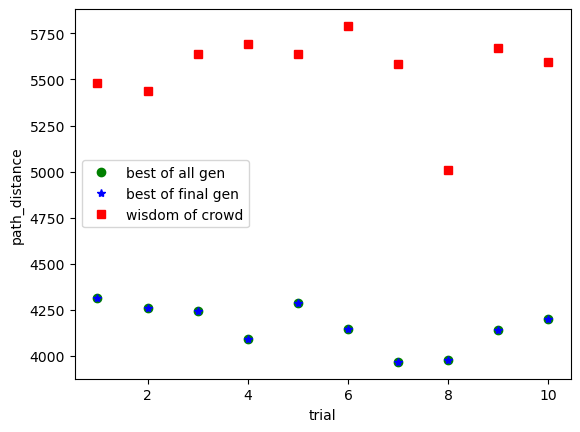

In [606]:
x_axis = []
y_axis1 = []
y_axis2 = []
y_axis3 = []

for i in range(len(finalDistance)):
    x_axis.append(i+1)
    
for i in finalDistance:
    y_axis1.append(i.best_of_all_gen)
    y_axis2.append(i.best_of_final_gen)
    y_axis3.append(i.woc)
plt.plot(x_axis, y_axis1, 'o', color='green', label='best of all gen')
plt.plot(x_axis, y_axis2, '*', color='blue', label='best of final gen')
plt.plot(x_axis, y_axis3, 's', color='red', label='wisdom of crowd')
plt.legend()
plt.xlabel('trial')
plt.ylabel('path_distance')
plt.show()

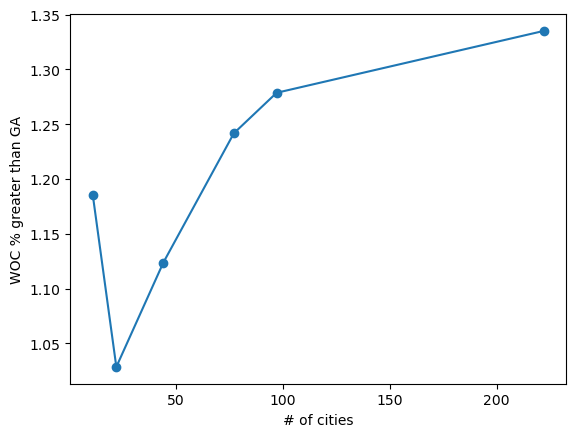

In [611]:
x_axis = [11, 22, 44, 77, 97, 222]
plt.plot(x_axis, avg_percent, marker='o')
plt.xlabel('# of cities')
plt.ylabel('WOC % greater than GA')
plt.show()